<a href="https://colab.research.google.com/github/WayneGame/pegasusstudio/blob/master/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spflow

In [3]:
from spn.structure.leaves.parametric.Parametric import Categorical

from spn.structure.Base import Sum, Product

from spn.structure.Base import assign_ids, rebuild_scopes_bottom_up


p0 = Product(children=[Categorical(p=[0.3, 0.7], scope=1), Categorical(p=[0.4, 0.6], scope=2)])
p1 = Product(children=[Categorical(p=[0.5, 0.5], scope=1), Categorical(p=[0.6, 0.4], scope=2)])
s1 = Sum(weights=[0.3, 0.7], children=[p0, p1])
p2 = Product(children=[Categorical(p=[0.2, 0.8], scope=0), s1])
p3 = Product(children=[Categorical(p=[0.2, 0.8], scope=0), Categorical(p=[0.3, 0.7], scope=1)])
p4 = Product(children=[p3, Categorical(p=[0.4, 0.6], scope=2)])
spn = Sum(weights=[0.4, 0.6], children=[p2, p4])

assign_ids(spn)
rebuild_scopes_bottom_up(spn)

SumNode_0

In [4]:
from spn.algorithms.Marginalization import marginalize

spn_marg = marginalize(spn, [1,2])

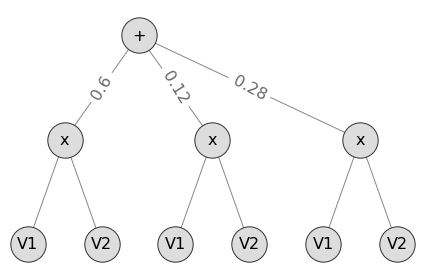

In [5]:
import matplotlib.pyplot as plt
from spn.io.Graphics import draw_spn

draw_spn(spn_marg)
plt.show()

In [6]:
import numpy as np
test_data = np.array([1.0, 0.0, 1.0]).reshape(-1, 3)

In [9]:
from spn.algorithms.Inference import log_likelihood
import time

start = time.time()

ll = log_likelihood(spn, test_data)
end = time.time()
dif = end-start

print(dif)
print(ll, np.exp(ll))

0.0019121170043945312
[[-1.90730501]] [[0.14848]]
